In [44]:
!pip install pandas

DEPRECATION: fair-research-login 0.2.4 has a non-standard dependency specifier globus-sdk<4.0.0>=1.5.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of fair-research-login or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import json

with open('./data/sbom_dep2.json') as f:
   data = json.load(f)

vulnerabilities = data['vulnerabilities']

In [5]:
for v in vulnerabilities:
  print(v['description'])

In engineSetMode of BaseBlockCipher.java, there is a possible incorrect cryptographic algorithm chosen due to an incomplete comparison. This could lead to local information disclosure with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android-10Android ID: A-148517383
A flaw was found in Keycloak before version 11.0.0, where the code base contains usages of ObjectInputStream without type checks. This flaw allows an attacker to inject arbitrarily serialized Java Objects, which would then get deserialized in a privileged context and potentially lead to remote code execution.
A flaw was found in FasterXML Jackson Databind, where it did not have entity expansion secured properly. This flaw allows vulnerability to XML external entity (XXE) attacks. The highest threat from this vulnerability is data integrity.
jackson-databind before 2.13.0 allows a Java StackOverflow exception and denial of service via a large depth of n

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
descriptions = []
for v in vulnerabilities:
  descriptions.append(v['description'])
  
labels = descriptions[:10]

print(labels)
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

['In engineSetMode of BaseBlockCipher.java, there is a possible incorrect cryptographic algorithm chosen due to an incomplete comparison. This could lead to local information disclosure with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android-10Android ID: A-148517383', 'A flaw was found in Keycloak before version 11.0.0, where the code base contains usages of ObjectInputStream without type checks. This flaw allows an attacker to inject arbitrarily serialized Java Objects, which would then get deserialized in a privileged context and potentially lead to remote code execution.', 'A flaw was found in FasterXML Jackson Databind, where it did not have entity expansion secured properly. This flaw allows vulnerability to XML external entity (XXE) attacks. The highest threat from this vulnerability is data integrity.', 'jackson-databind before 2.13.0 allows a Java StackOverflow exception and denial of service via a large

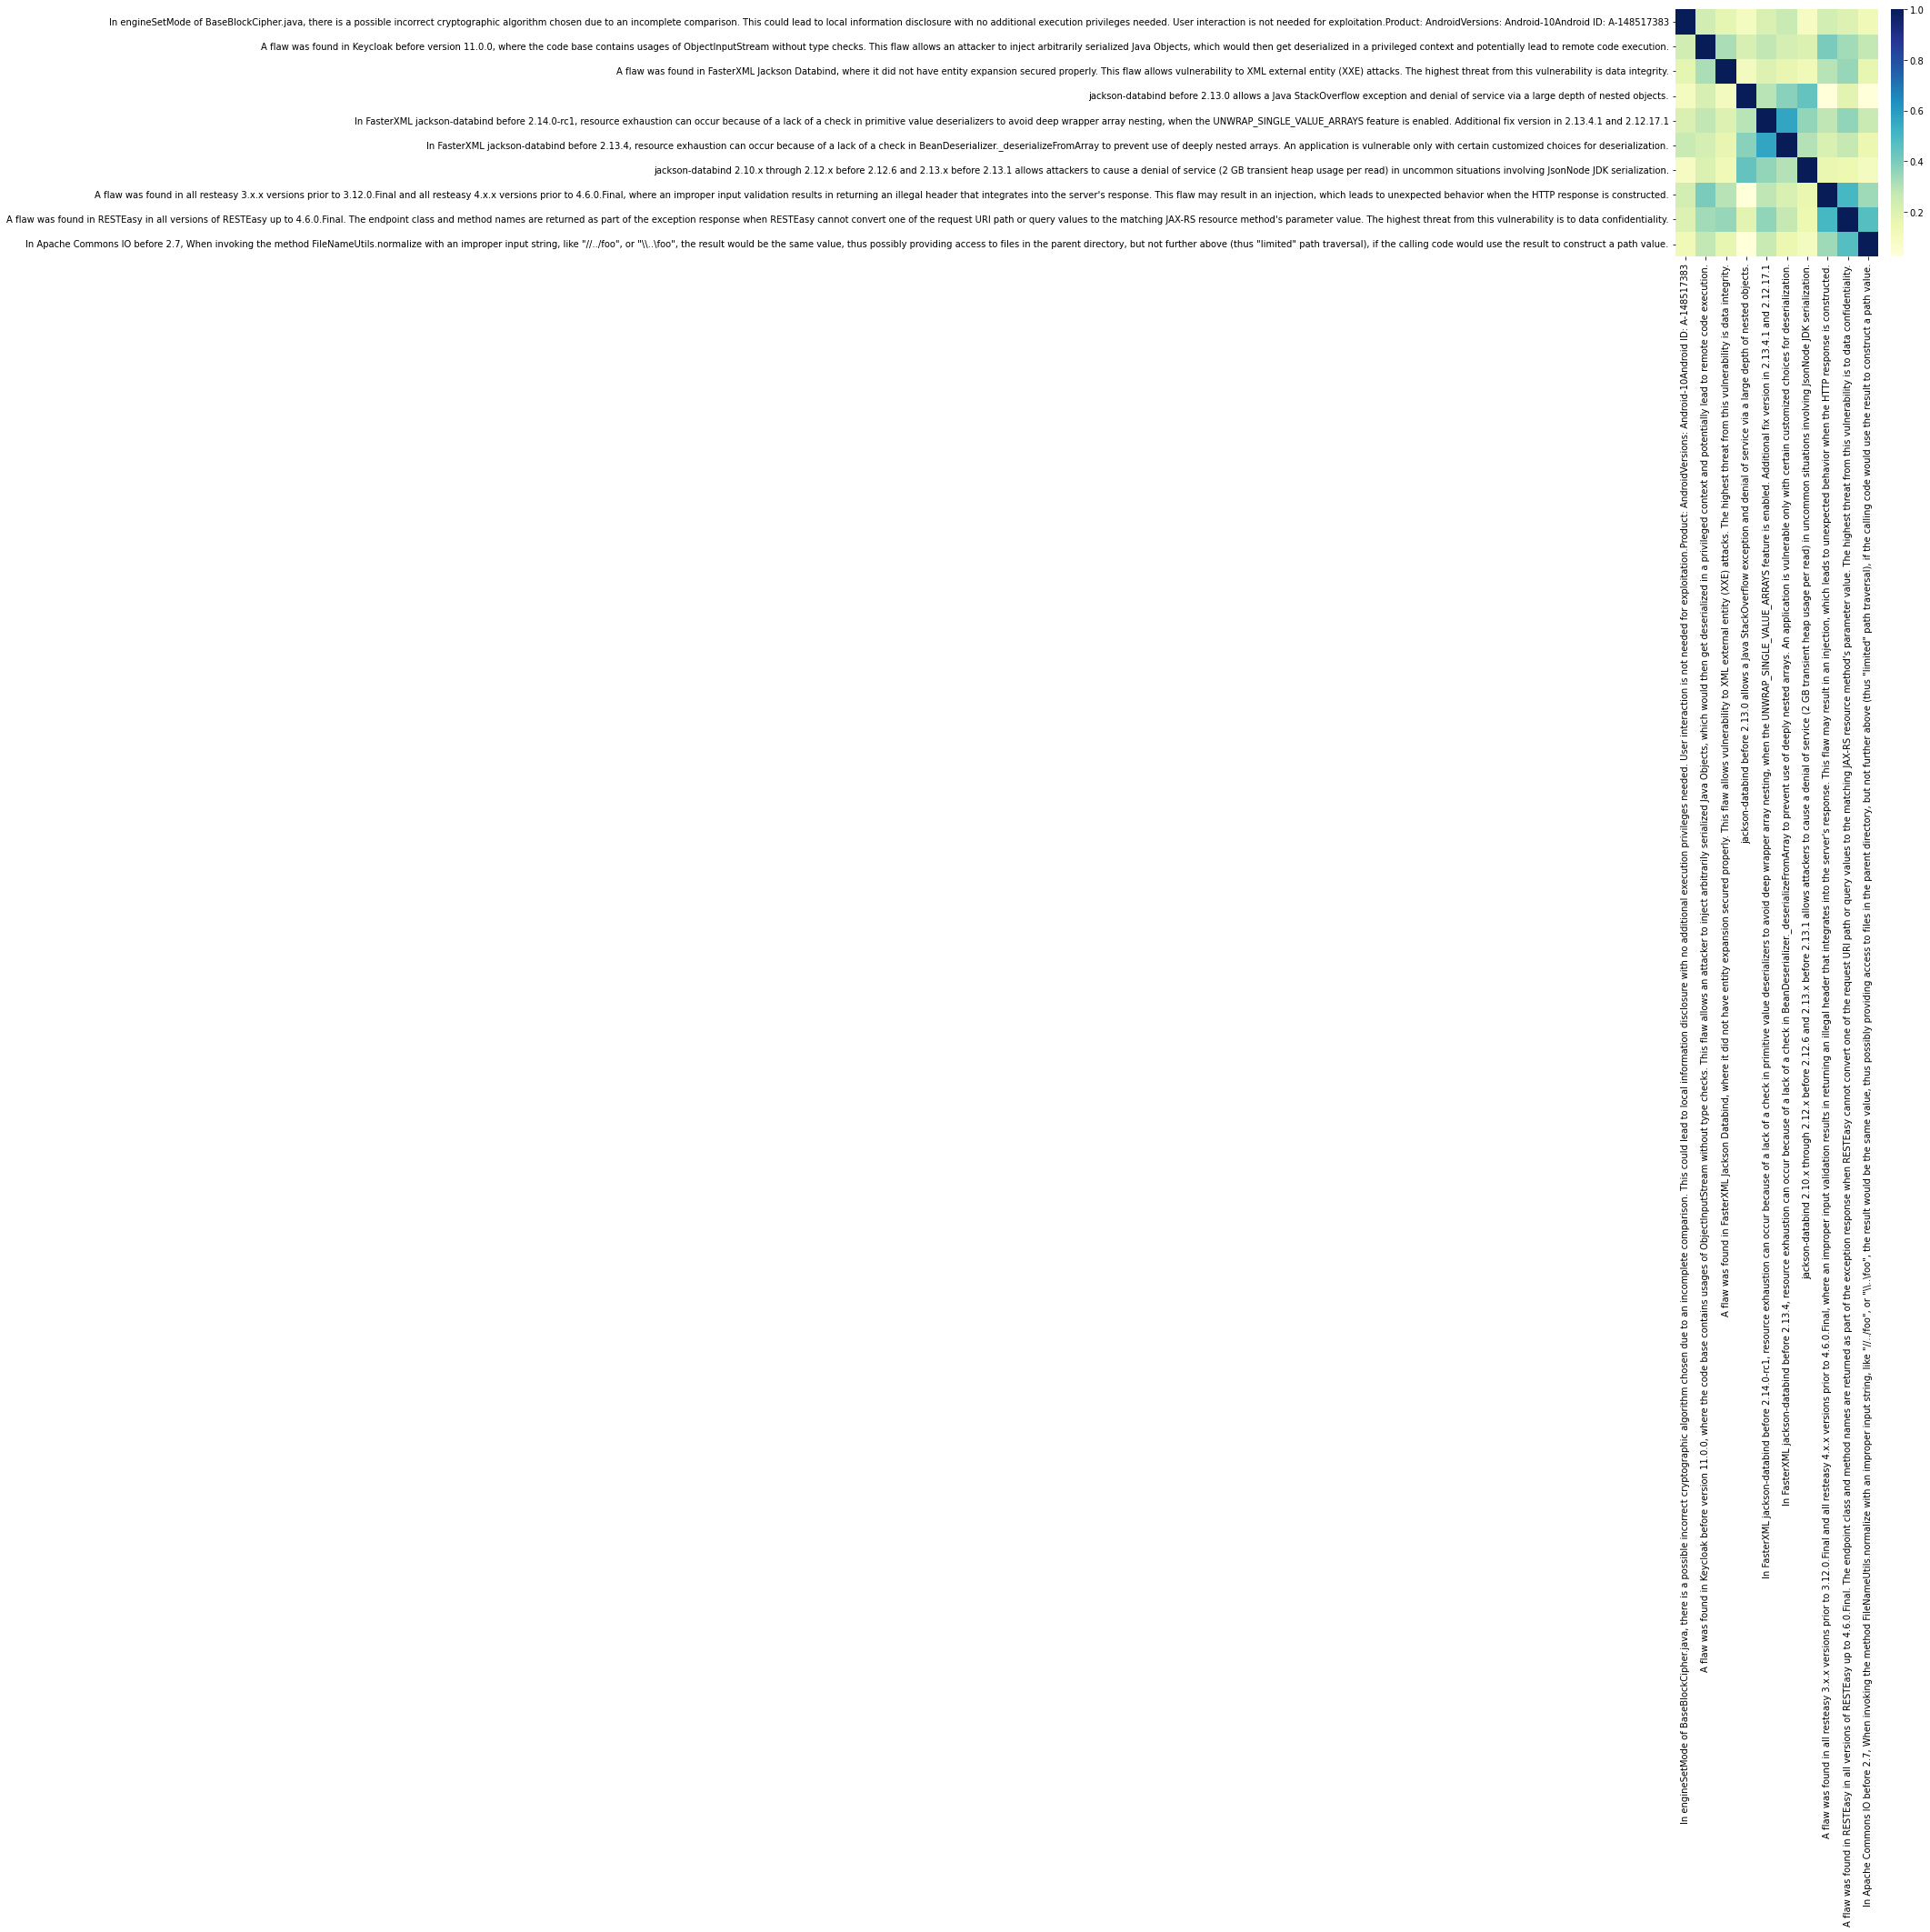

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(labels)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

In [19]:
print(cosine_similarity(arr))

[[1.         0.23547525 0.17428408 0.09583148 0.20619652 0.2584383
  0.09394228 0.2297384  0.19900744 0.12668519]
 [0.23547525 1.         0.31420934 0.21500329 0.27756806 0.22778673
  0.20323744 0.39761815 0.32802929 0.27069077]
 [0.17428408 0.31420934 1.         0.10229915 0.19810145 0.16093017
  0.12535305 0.29429213 0.34900602 0.16528744]
 [0.09583148 0.21500329 0.10229915 1.         0.29047375 0.37080992
  0.44112877 0.02397317 0.17799766 0.02203263]
 [0.20619652 0.27756806 0.19810145 0.29047375 1.         0.56575238
  0.35593425 0.27854301 0.35905312 0.25599606]
 [0.2584383  0.22778673 0.16093017 0.37080992 0.56575238 1.
  0.29740896 0.21011516 0.2700135  0.14854398]
 [0.09394228 0.20323744 0.12535305 0.44112877 0.35593425 0.29740896
  1.         0.15862879 0.1472248  0.09719228]
 [0.2297384  0.39761815 0.29429213 0.02397317 0.27854301 0.21011516
  0.15862879 1.         0.50139217 0.33804284]
 [0.19900744 0.32802929 0.34900602 0.17799766 0.35905312 0.2700135
  0.1472248  0.5013921

In [1]:
import torch
from transformers import AutoModel, AutoTokenizer
from scipy.spatial.distance import cosine

# Get our models - The package will take care of downloading the models automatically
# For best performance: Muennighoff/SGPT-5.8B-weightedmean-nli-bitfit
tokenizer = AutoTokenizer.from_pretrained("Muennighoff/SGPT-125M-weightedmean-nli-bitfit")
model = AutoModel.from_pretrained("Muennighoff/SGPT-125M-weightedmean-nli-bitfit")
# Deactivate Dropout (There is no dropout in the above models so it makes no difference here but other SGPT models may have dropout)
model.eval()



GPTNeoModel(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(2048, 768)
  (drop): Dropout(p=0, inplace=False)
  (h): ModuleList(
    (0): GPTNeoBlock(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPTNeoAttention(
        (attention): GPTNeoSelfAttention(
          (attn_dropout): Dropout(p=0, inplace=False)
          (resid_dropout): Dropout(p=0, inplace=False)
          (k_proj): Linear(in_features=768, out_features=768, bias=False)
          (v_proj): Linear(in_features=768, out_features=768, bias=False)
          (q_proj): Linear(in_features=768, out_features=768, bias=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPTNeoMLP(
        (c_fc): Linear(in_features=768, out_features=3072, bias=True)
        (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        (act): NewGELUActivation()
        (drop

In [2]:
# Tokenize input texts
texts = [
    "deep learning",
    "artificial intelligence",
    "deep diving",
    "artificial snow",
]
batch_tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    # Get hidden state of shape [bs, seq_len, hid_dim]
    last_hidden_state = model(**batch_tokens, output_hidden_states=True, return_dict=True).last_hidden_state

# Get weights of shape [bs, seq_len, hid_dim]
weights = (
    torch.arange(start=1, end=last_hidden_state.shape[1] + 1)
    .unsqueeze(0)
    .unsqueeze(-1)
    .expand(last_hidden_state.size())
    .float().to(last_hidden_state.device)
)

# Get attn mask of shape [bs, seq_len, hid_dim]
input_mask_expanded = (
    batch_tokens["attention_mask"]
    .unsqueeze(-1)
    .expand(last_hidden_state.size())
    .float()
)

# Perform weighted mean pooling across seq_len: bs, seq_len, hidden_dim -> bs, hidden_dim
sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded * weights, dim=1)
sum_mask = torch.sum(input_mask_expanded * weights, dim=1)

embeddings = sum_embeddings / sum_mask


In [3]:

# Calculate cosine similarities
# Cosine similarities are in [-1, 1]. Higher means more similar
cosine_sim_0_1 = 1 - cosine(embeddings[0], embeddings[1])
cosine_sim_0_2 = 1 - cosine(embeddings[0], embeddings[2])
cosine_sim_0_3 = 1 - cosine(embeddings[0], embeddings[3])

print("Cosine similarity between \"%s\" and \"%s\" is: %.3f" % (texts[0], texts[1], cosine_sim_0_1))
print("Cosine similarity between \"%s\" and \"%s\" is: %.3f" % (texts[0], texts[2], cosine_sim_0_2))
print("Cosine similarity between \"%s\" and \"%s\" is: %.3f" % (texts[0], texts[3], cosine_sim_0_3))

Cosine similarity between "deep learning" and "artificial intelligence" is: 0.591
Cosine similarity between "deep learning" and "deep diving" is: 0.563
Cosine similarity between "deep learning" and "artificial snow" is: 0.370


In [8]:
# Tokenize input texts
texts = labels
batch_tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    # Get hidden state of shape [bs, seq_len, hid_dim]
    last_hidden_state = model(**batch_tokens, output_hidden_states=True, return_dict=True).last_hidden_state

# Get weights of shape [bs, seq_len, hid_dim]
weights = (
    torch.arange(start=1, end=last_hidden_state.shape[1] + 1)
    .unsqueeze(0)
    .unsqueeze(-1)
    .expand(last_hidden_state.size())
    .float().to(last_hidden_state.device)
)

# Get attn mask of shape [bs, seq_len, hid_dim]
input_mask_expanded = (
    batch_tokens["attention_mask"]
    .unsqueeze(-1)
    .expand(last_hidden_state.size())
    .float()
)

# Perform weighted mean pooling across seq_len: bs, seq_len, hidden_dim -> bs, hidden_dim
sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded * weights, dim=1)
sum_mask = torch.sum(input_mask_expanded * weights, dim=1)

embeddings = sum_embeddings / sum_mask


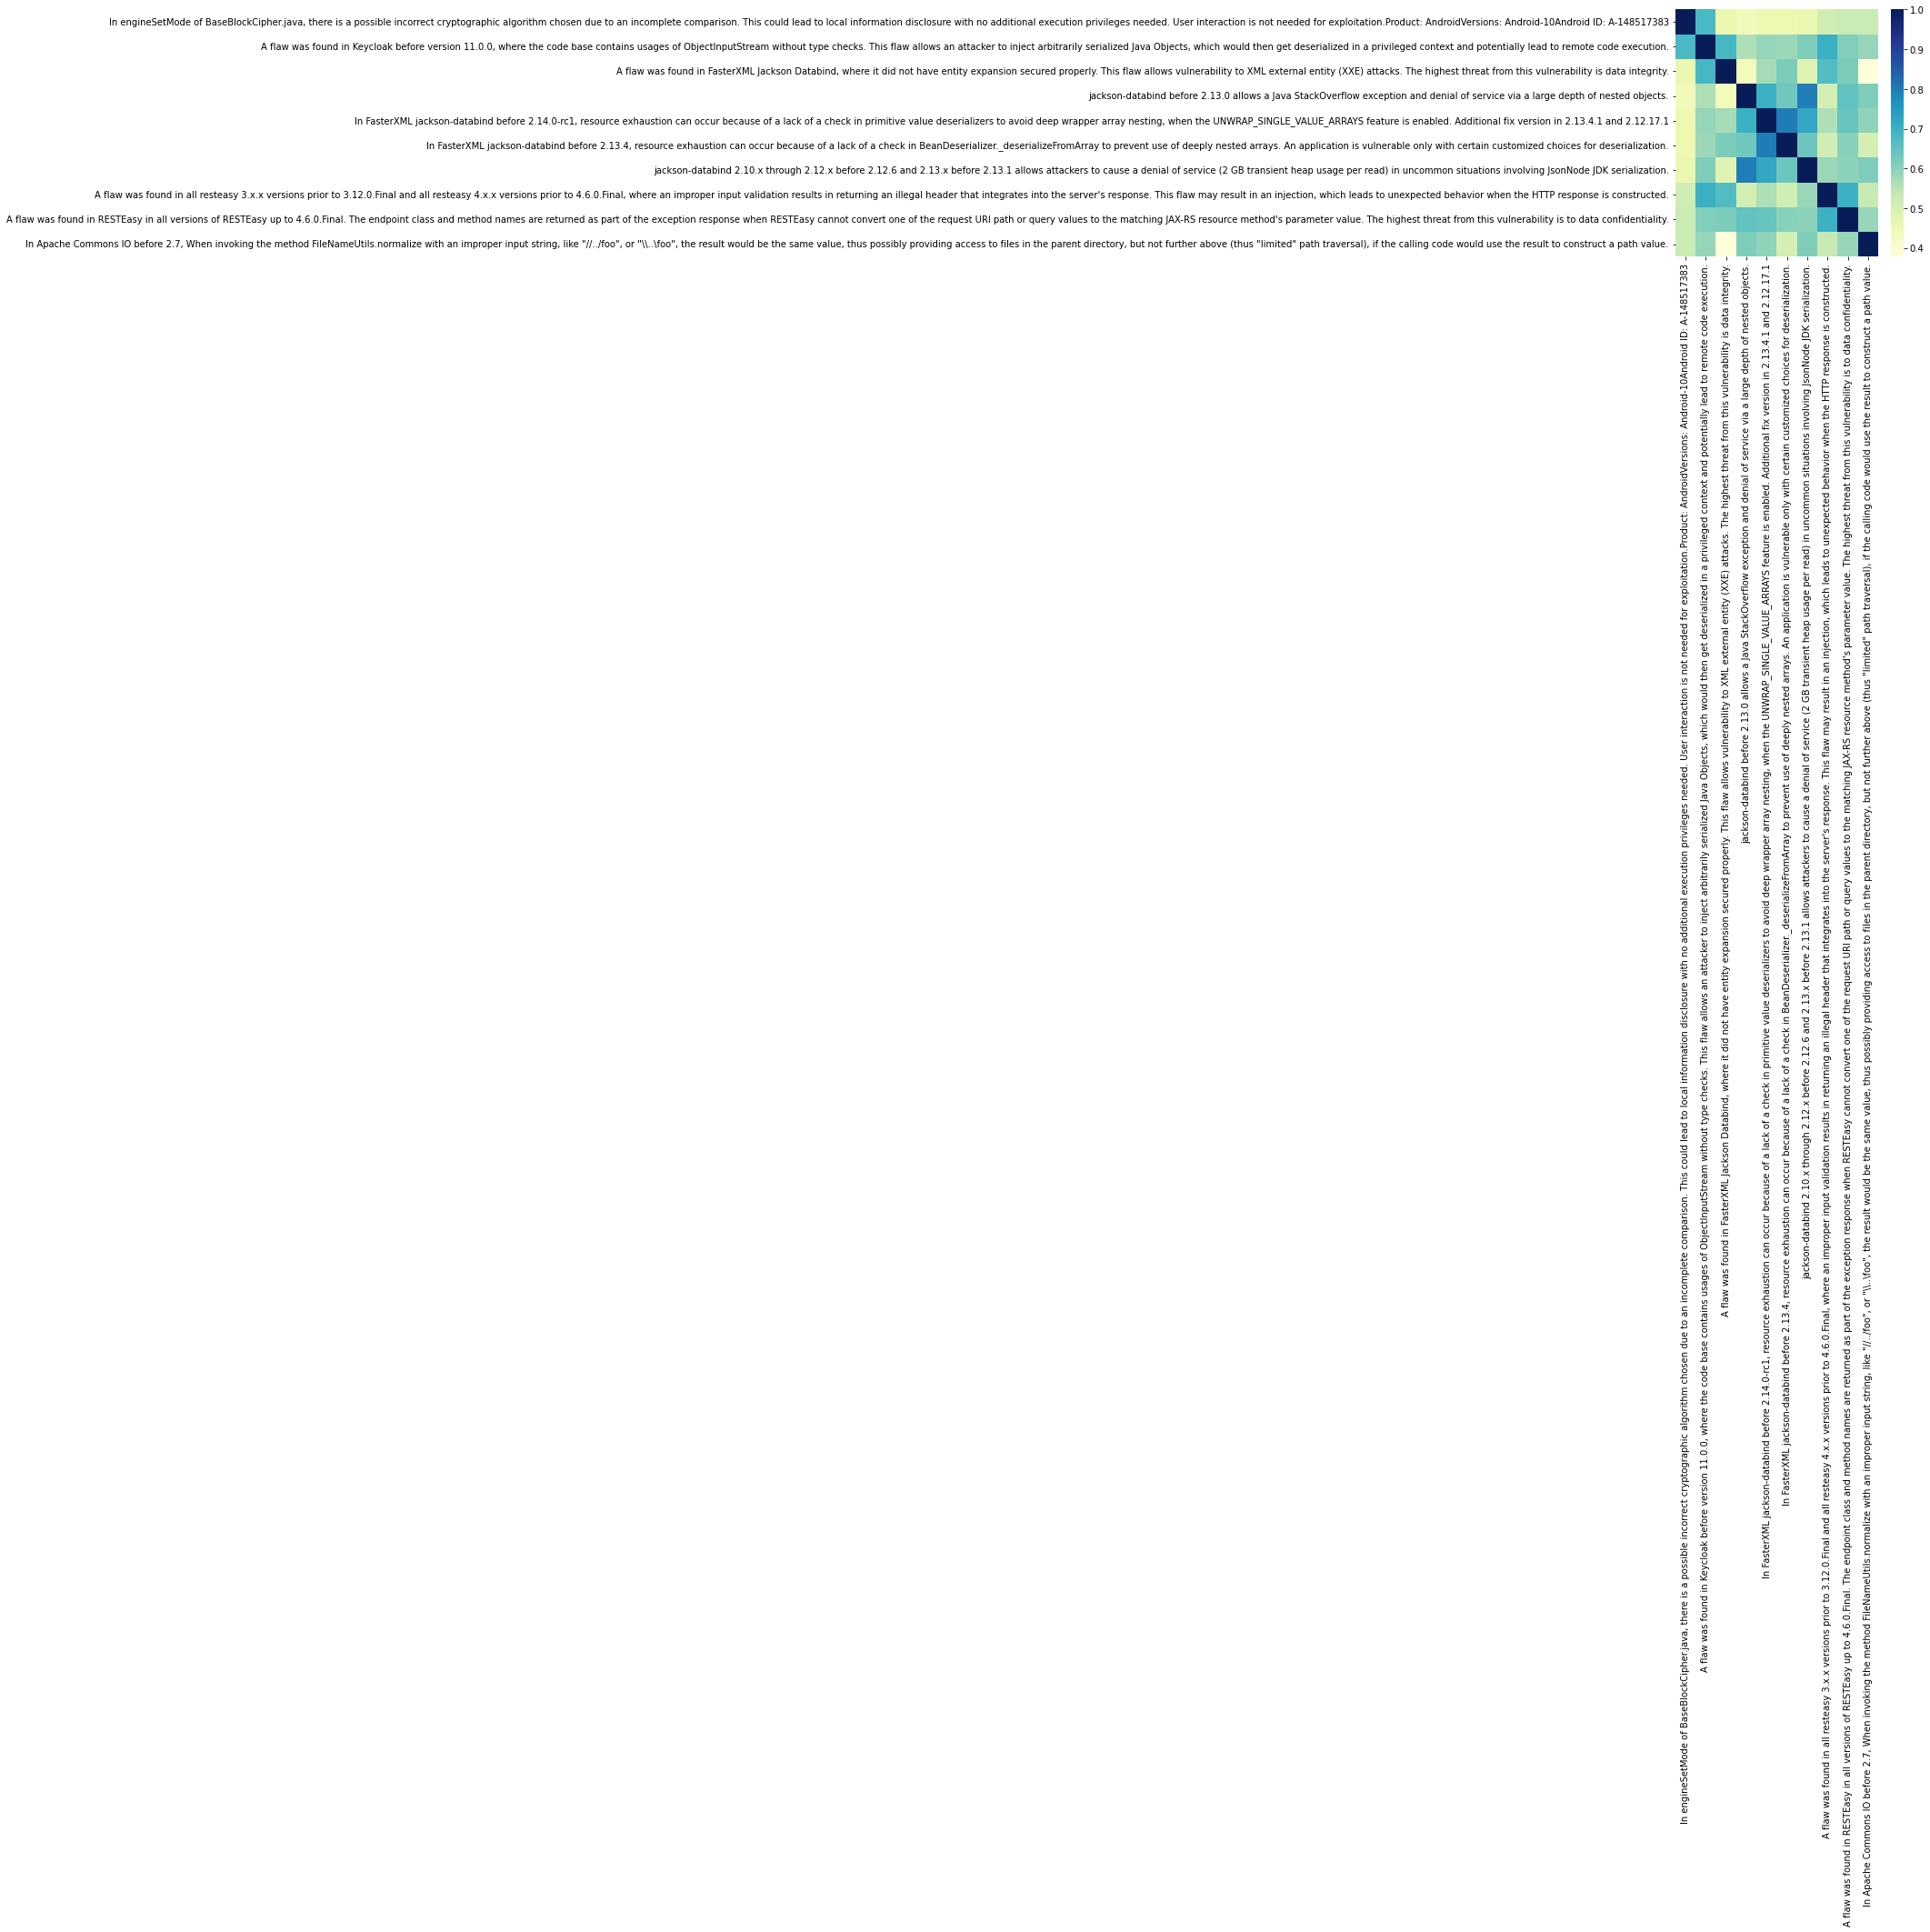

In [12]:

# Calculate cosine similarities
# Cosine similarities are in [-1, 1]. Higher means more similar
cosine_sim_0_1 = 1 - cosine(embeddings[0], embeddings[1])
cosine_sim_0_2 = 1 - cosine(embeddings[0], embeddings[2])
cosine_sim_0_3 = 1 - cosine(embeddings[0], embeddings[3])

create_heatmap(cosine_similarity(embeddings))